# PART 3

/Users/suprajbejugam/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/Users/suprajbejugam/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



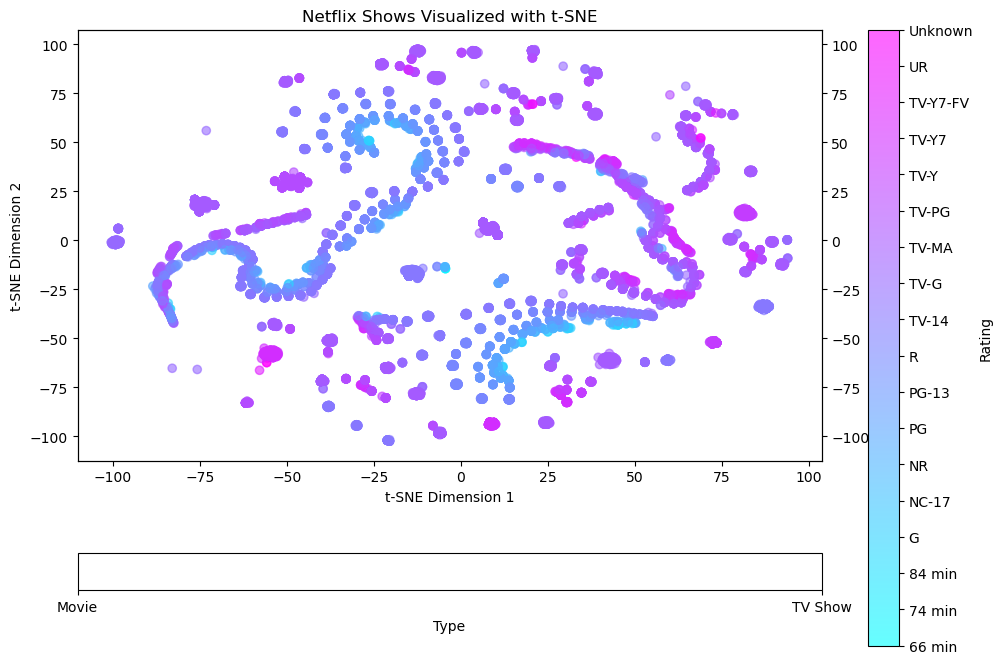

In [21]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Load your dataset
netflix_shows = pd.read_csv('netflix_titles.csv')

# Preprocess the dataset
netflix_shows.fillna('Unknown', inplace=True)
rating_label_encoder = LabelEncoder()

# Encode 'rating'
netflix_shows['rating_encoded'] = rating_label_encoder.fit_transform(netflix_shows['rating'])

# Clean 'duration' by separating the entries into movies and TV shows
netflix_shows['duration_numeric'] = netflix_shows['duration'].str.extract('(\d+)').astype(float)
# Fill NaN for TV shows, as they do not have a numeric duration
netflix_shows['duration_numeric'] = netflix_shows['duration_numeric'].fillna(-1)

# Assume 'type' column indicates if the entry is a Movie or TV Show
netflix_shows['type_encoded'] = netflix_shows['type'].map({'Movie': 0, 'TV Show': 1})

# Select features for t-SNE
features = netflix_shows[['rating_encoded', 'duration_numeric']]

# t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(features)

# Visualization
fig, ax1 = plt.subplots(figsize=(12, 8))

# Scatter plot for t-SNE dimensions
scatter = ax1.scatter(tsne_results[:, 0], tsne_results[:, 1], c=netflix_shows['rating_encoded'], cmap='cool', alpha=0.6)
# Create a colorbar for the 'rating' feature
cbar = fig.colorbar(scatter, ax=ax1, orientation='vertical')
cbar.set_ticks(range(len(rating_label_encoder.classes_)))
cbar.set_ticklabels(rating_label_encoder.classes_)
cbar.set_label('Rating')

# Create another axis for the second colorbar
ax2 = ax1.twinx()
# Plot the same scatter plot on this new axis, but color by 'type' (Movie or TV Show)
scatter2 = ax2.scatter(tsne_results[:, 0], tsne_results[:, 1], c=netflix_shows['type_encoded'], cmap='autumn', alpha=0)
# Create a colorbar for the 'type' feature
cbar2 = fig.colorbar(scatter2, ax=ax2, orientation='horizontal')
cbar2.set_ticks([0, 1])
cbar2.set_ticklabels(['Movie', 'TV Show'])
cbar2.set_label('Type')

ax1.set_title('Netflix Shows Visualized with t-SNE')
ax1.set_xlabel('t-SNE Dimension 1')
ax1.set_ylabel('t-SNE Dimension 2')

plt.show()